# Lab 7 Radio Imaging

In [27]:
#importing packages
import numpy as np
import glob
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## Azimuth Data

In [28]:
#setting data location and path to where images should be saved
datafolder = '/mnt/c/Users/loabn/Downloads/Lab_7data/Radio_Data_Sun/sun_azimuth/'
savedir = '/mnt/c/Users/loabn/Desktop/Lab7Imgs/'
az_files = glob.glob(datafolder+'sun*')
az_files.sort()

In [29]:
#reading in data for azimuth 
az_spectra = []
az_levels = []

for file in az_files:
    name = file.split('sun')[-1][:-4]
    aznum = np.float64(name.split('_')[0])
    az_levels.append(aznum)
    
    with open(file) as inData:
        spectrum_rows = []
        for i, row in enumerate(inData, start=1):
            if i%4 ==0:
                spectrum_rows.append(row)
                
        #summing over all rows in each file
        full_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            values = row.split(' ')
            spec = [np.float64(val) for val in values if val!='\n' and val!=' ' and val!='']
            full_spectrum += spec
        az_spectra.append(full_spectrum)

In [30]:
#sorting spectra by azimuth offset value
az_spectra= [x[1] for x in sorted(zip(az_levels, az_spectra), key = lambda p : p[0])]
az_levels = [x[0] for x in sorted(zip(az_levels, az_spectra), key = lambda p : p[0])]

In [31]:
#defining frequency range based on min and max frequencies and offset (in MHz)
max_freq = 1426.000
min_freq = 1416.000
spacing = 0.009766
freqs = np.arange(min_freq, max_freq, spacing)

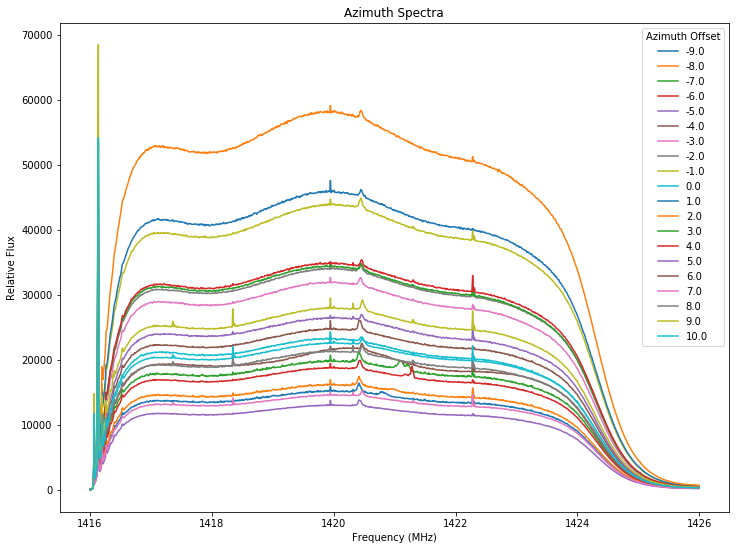

In [32]:
#plotting all spectra
fig, ax = plt.subplots(1,1, figsize=(12,9))
for spec, name in zip(az_spectra, az_levels):
    ax.plot(freqs, spec, label = str(name))
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Relative Flux')
ax.set_title('Azimuth Spectra')
ax.legend(title='Azimuth Offset')
plt.savefig(savedir+'azi_spect_all.png')

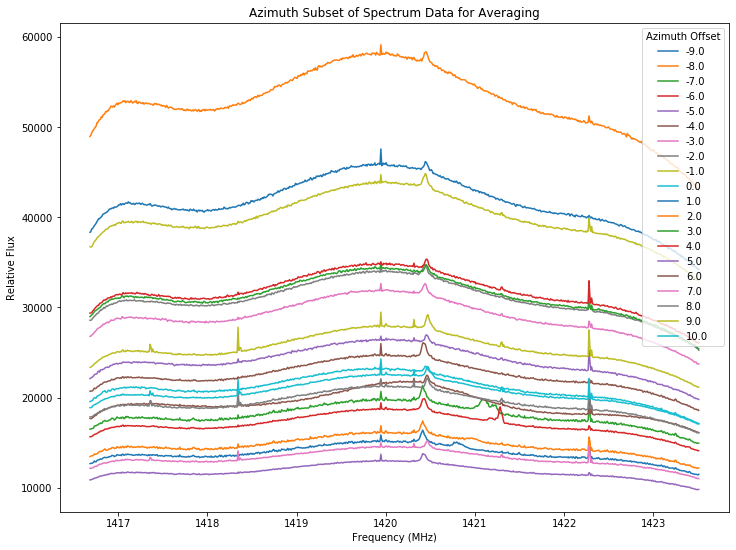

In [33]:
#selecting a subset, averaging that subset for each spectrum and plotting that subset
azmeanvals = []

fig, ax = plt.subplots(1,1, figsize=(12,9))
for spec, name in zip(az_spectra, az_levels):
    mean = np.mean(spec[70:770])
    ax.plot(freqs[70:770], spec[70:770], label=str(name))
    azmeanvals.append(mean)
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Relative Flux')
ax.set_title('Azimuth Subset of Spectrum Data for Averaging')
ax.legend(title='Azimuth Offset')
plt.savefig(savedir+'azi_spect_cut.png')

In [34]:
#defining gaussian function for curvefit
def Gaussian(x, a, mean, sigma):
    return (a/sigma*((2*np.pi)**(1/2)))*np.exp(-0.5*(((x-mean)/sigma)**2))

In [35]:
#defining guess parameters and running curvefit
guess = [50000,7,7]
azcoeffs, fiterr = curve_fit(Gaussian, az_levels, azmeanvals, p0=guess)

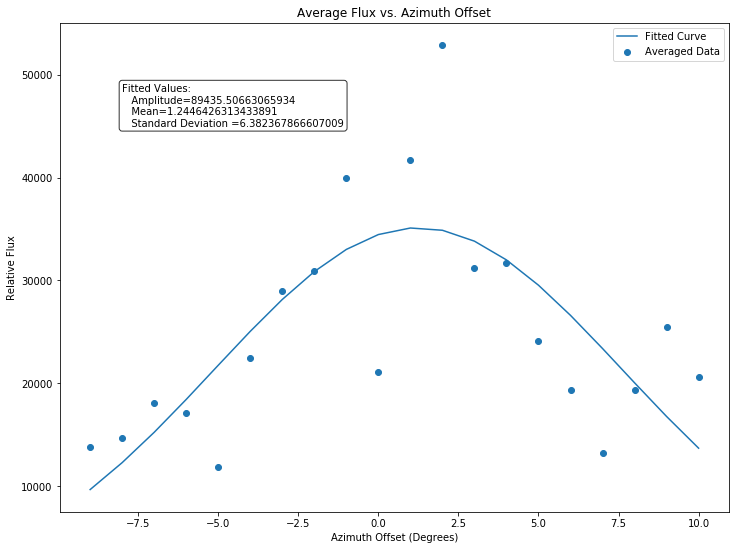

In [36]:
#Plotting averaged curve data and curvefit result
fig, ax = plt.subplots(1,1, figsize=(12,9))
ax.scatter(az_levels, azmeanvals, label = 'Averaged Data')
ax.plot(az_levels, Gaussian(az_levels, *azcoeffs), label = 'Fitted Curve')
ax.legend()
ax.set_xlabel('Azimuth Offset (Degrees)')
ax.set_ylabel('Relative Flux')
ax.set_title('Average Flux vs. Azimuth Offset')
plt.text(-8, 4.5e4, 'Fitted Values:\n   Amplitude={}\n   Mean={}\n   Standard Deviation ={}'.format(*azcoeffs), bbox=dict(boxstyle = 'round', facecolor='white',alpha=0.8))
plt.savefig(savedir+'azi_spect_avgfit.png')

In [37]:
#defining equation for full width half max
def FWHM(stddev):
    return 2*np.sqrt(2*np.log(2))*stddev

In [38]:
print('The Full Width Half Max of the Azimuth Curve is {}'.format(FWHM(azcoeffs[-1])))

The Full Width Half Max of the Azimuth Curve is 15.0293277870476


## Elevation

In [39]:
#defining data location and filenames for elevation data
datafolder = '/mnt/c/Users/loabn/Downloads/Lab_7data/Radio_Data_Sun/sun_elevation/'
el_files = glob.glob(datafolder+'sun*')
el_files.sort()

In [40]:
#reading in elevation data
el_spectra = []
el_levels = []

for file in el_files:
    name = file.split('_')[-1]
    if name[0]=='m':
        elval = -np.float64(name[1:])
    elif name[0]=='p':
        elval = np.float64(name[1:])
    el_levels.append(elval)
    
    with open(file) as inData:
        spectrum_rows = []
        for i, row in enumerate(inData, start=1):
            if i%4 ==0:
                spectrum_rows.append(row)
                
        #summing flux values for all rows for each elevation offset level
        full_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            values = row.split(' ')
            spec = [np.float64(val) for val in values if val!='\n' and val!=' ' and val!='']
            full_spectrum += spec
        el_spectra.append(full_spectrum)

In [41]:
#sorting data by elevation offset value
el_spectra= [x[1] for x in sorted(zip(el_levels, el_spectra), key = lambda p : p[0])]
el_levels = [x[0] for x in sorted(zip(el_levels, el_spectra), key = lambda p : p[0])]

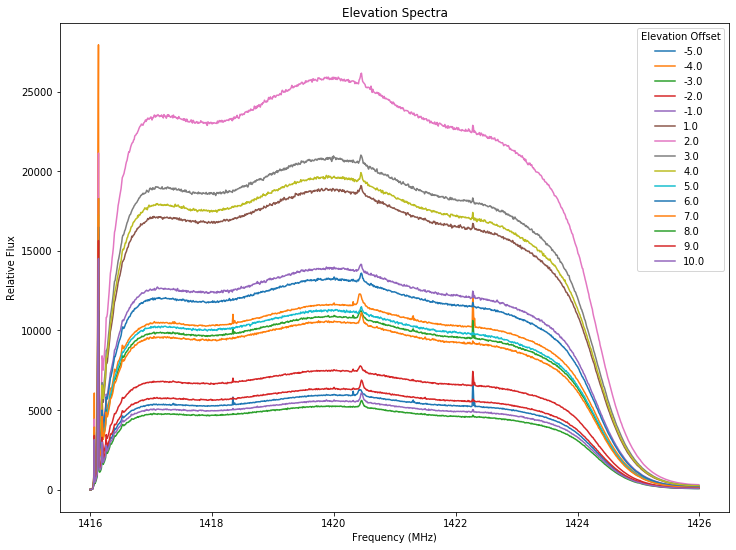

In [42]:
#plotting summed data and frequency
fig, ax = plt.subplots(1,1, figsize=(12,9))
for spec,name in zip(el_spectra, el_levels):
    ax.plot(freqs, spec, label=str(name))
    
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Relative Flux')
ax.set_title('Elevation Spectra')
ax.legend(title='Elevation Offset')

plt.savefig(savedir+'elev_spect_all.png')

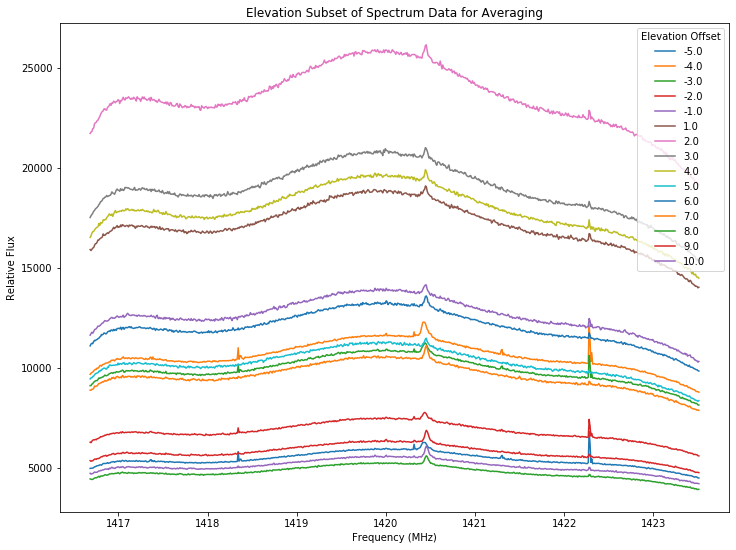

In [43]:
#selecting a subset of the data, plotting that subset, and taking an average to get one point per elevation 
elmeanvals = []

fig, ax = plt.subplots(1,1, figsize=(12,9))
for spec, name in zip(el_spectra, el_levels):
    mean = np.mean(spec[70:770])
    ax.plot(freqs[70:770], spec[70:770], label=str(name))
    elmeanvals.append(mean)
    
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Relative Flux')
ax.set_title('Elevation Subset of Spectrum Data for Averaging')
ax.legend(title='Elevation Offset')
plt.savefig(savedir+'elev_spect_cut.png')

In [51]:
#running curve fit for elevation
guess = [25000,2,4]
elcoeffs, fiterr = curve_fit(Gaussian, el_levels, elmeanvals, p0=guess)

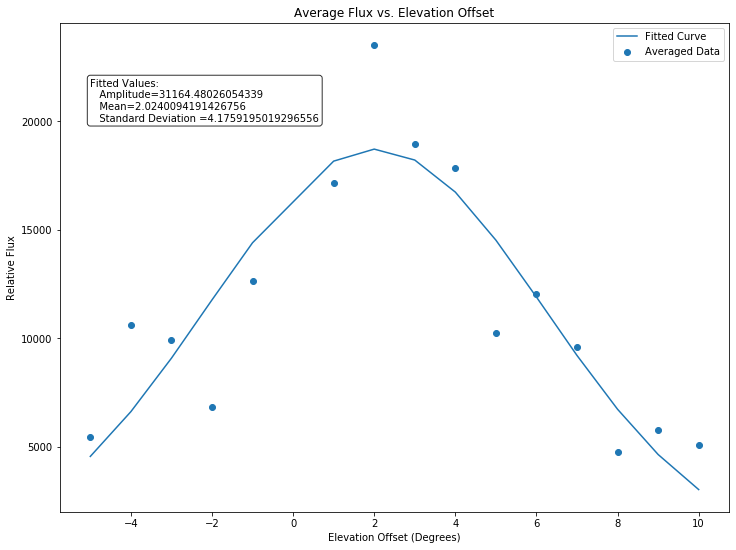

In [56]:
#plotting the averaged data points and the curve fit results
fig, ax = plt.subplots(1,1, figsize=(12,9))
ax.scatter(el_levels, elmeanvals, label='Averaged Data')
ax.plot(el_levels, Gaussian(el_levels, *elcoeffs), label='Fitted Curve')
ax.legend()
ax.set_xlabel('Elevation Offset (Degrees)')
ax.set_ylabel('Relative Flux')
ax.set_title('Average Flux vs. Elevation Offset')
plt.text(-5, 2e4, 'Fitted Values:\n   Amplitude={}\n   Mean={}\n   Standard Deviation ={}'.format(*elcoeffs), bbox=dict(boxstyle = 'round', facecolor='white',alpha=0.8))
plt.savefig(savedir+'elev_spect_avgfit.png')

In [46]:
print('The Full Width Half Max of the Elevation Curve is {}'.format(FWHM(elcoeffs[-1])))

The Full Width Half Max of the Elevation Curve is 9.83353894957961
